<a href="https://colab.research.google.com/github/AlexanderPr03/ML/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codul de mai jos este utilizat pentru a filtra și selecta datele din fișierul immo_data.csv, iar mai apoi aceste date sunt utilizate pentru a antrena un model cu Random Forest Regression.

In [ ]:
# Importurile utilizate
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Citim fișierul
df = pd.read_csv('immo_data.csv')

Mai jos afișăm niște date generale despre setul de date

In [ ]:
# Shape-ul
print("\nShape:", df.shape)

# Coloanele
print("\nColoane: \n", df.columns)

# Valorile numerice
print("\nValori numerice:\n", df.describe())

# Valori unice (daca avem duplicate)
print("\nValori unice:\n", df.nunique())

# Tipuri de date din df
print("\nTipuri de date:\n", df.dtypes)


Shape: (268850, 49)

Coloane> 
 Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

Valori numerice:
        serviceCharge  telekomHybridUploadSpeed   picturecount     pricetrend  \
count  261941.000000                 

Valorile duplicate au creat mici probleme în procesul de crearea a modelului, din anumite motive Scalingul Datelor adăuga valori NaN în array-ul X_train

In [ ]:
print("Duplicate: ", df.duplicated().sum())

Duplicate:  0


Mai jos utilizăm LabelEncoder pentru a transforma toate datele categorical în numere.

In [ ]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna('Absent')
        df[col] = le.fit_transform(df[col])

# Verificam schimbarile
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  int64  
 1   serviceCharge             261941 non-null  float64
 2   heatingType               268850 non-null  int64  
 3   telekomTvOffer            268850 non-null  int64  
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

Urmează să ne ocupăm de outliers. Mai jos vedem, cu ajutorul unui box plot, că avem anumite valori foarte extreme.

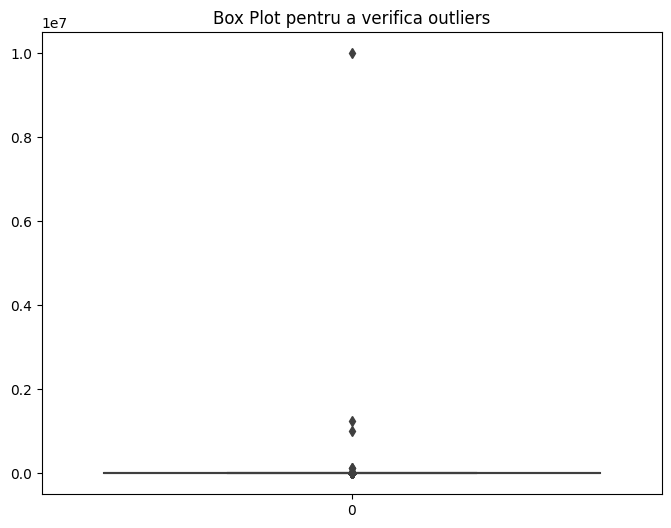

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df['baseRent'])
plt.title('Box Plot pentru a verifica outliers')
plt.show()

Așa că vom scăpa de ele tăind capetele cu câte 4%

In [ ]:
q_low = df["baseRent"].quantile(0.04)
q_hi  = df["baseRent"].quantile(0.96)

df = df[(df["baseRent"] < q_hi) & (df["baseRent"] > q_low)]

Și obținem un box plot mult mai vizibil.

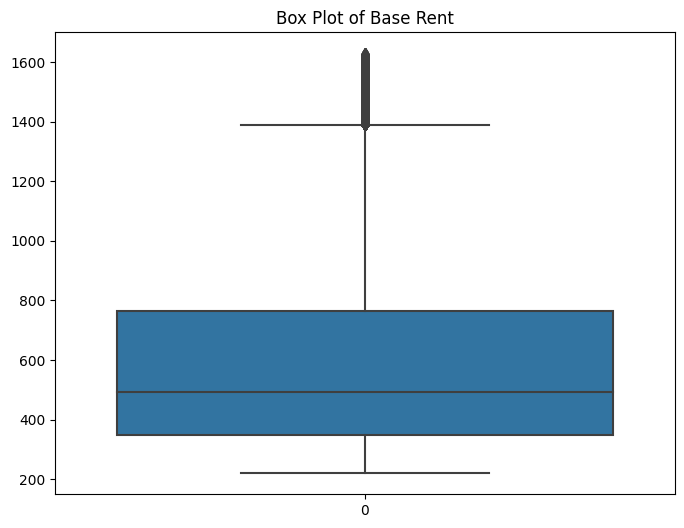

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df['baseRent'])
plt.title('Box Plot of Base Rent')
plt.show()

Ne ocupăm de valorile NaN rămase.

In [ ]:
for col in df:
    df[col].fillna(df[col].mean(), inplace=True)

Împărțim datele în date pentru training și date pentru testing.

In [ ]:
X = df.drop('baseRent', axis=1)
y = df['baseRent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.describe()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
count,246457.000000,246457.000000,246457.000000,246457.000000,246457.0,246457.000000,246457.000000,246457.000000,2.464570e+05,246457.000000,...,246457.000000,246457.000000,246457.000000,246457.000000,246457.000000,246457.000000,246457.000000,246457.000000,246457.000000,246457.000000
mean,8.324389,147.053214,2.646766,1.754497,10.0,9.673834,3.378514,28.879185,8.449617e+02,1966.165123,...,182.503508,4373.682456,99610.514475,85426.463067,77.075133,2.947484,2013.956105,89.065232,0.199705,1.302722
std,4.245187,307.592122,3.056613,0.672368,0.0,6.222568,1.897376,15.270242,3.182987e+04,41.528951,...,114.751546,2505.911836,63855.633214,52872.076857,86.099596,2.141995,5.862363,2.280200,0.004074,1.071150
min,0.000000,0.000000,0.000000,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1015.000000,71.430000,0.170500,0.000000
25%,6.000000,100.000000,1.000000,2.000000,10.0,6.000000,2.040000,10.000000,5.042300e+02,1958.000000,...,81.000000,2278.000000,41162.000000,45947.000000,77.075133,2.000000,2013.956105,89.065232,0.199705,0.000000
50%,9.000000,140.000000,1.000000,2.000000,10.0,9.000000,3.378514,40.000000,7.360000e+02,1966.165123,...,178.000000,4487.000000,96332.000000,71622.000000,77.075133,2.000000,2013.956105,89.065232,0.199705,1.000000
75%,12.000000,180.000000,5.000000,2.000000,10.0,13.000000,4.520000,40.000000,8.840000e+02,1991.000000,...,263.000000,6568.000000,156021.000000,131403.000000,77.075133,3.000000,2013.956105,89.065232,0.199705,2.000000
max,15.000000,146118.000000,13.000000,3.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,...,418.000000,8683.000000,212621.000000,189526.000000,12613.000000,10.000000,2919.000000,90.760000,0.227600,3.000000


In [ ]:
df = df.fillna(method='ffill')

Încercând mai multe variante pentru hyperparametri, am ajuns la concluzia ca si doar 5 trees cu max_depth de 100 sunt de ajuns pentru a atinge un scor r2 mai mare de 0.99. Pentru setarile default, codul dat ar fi avut nevoie de minim 25-30 de minute pentru a se antrena. Acum, dureaza doar cateva secunde.

In [ ]:
model = RandomForestRegressor(n_estimators=5, max_depth=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluăm modelul
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Scor R^2: {r2}")


MSE: 805.1652039173091
MAE: 13.128529619410859
Scor R^2: 0.9920051661708257
